<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICCreditStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn the basic flow of machine learning and how to use the library through Kaggle datasets.
Learn and estimate the Home Credit Default Risk competition on Kaggle.

link: Home Credit Default Risk | Kaggle

**[Problem 1] Confirmation of competition contents**

Read the overview page of the competition and check the following points about "Home Credit Default Risk".

What to learn and what to predict?
What kind of file to create and submit to Kaggle?
What kind of index value will be used to evaluate the submissions?

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

The first step is to create a baseline model using a simple method. This model is the standard for accuracy.

It does not need to be highly accurate. The goal is to be able to run without errors and submit estimates to Kaggle.

**[Problem 2] Learning and verification**

Create and execute a series of steps from easy analysis, preprocessing, learning, and verification of data.

For verification, please use the evaluation metrics used in this competition. The method used for learning is not specified.

Loading the data.

In [1]:
import numpy as np
import pandas as pd

**ANALYSIS**

In [3]:
df = pd.read_csv('application_train.csv.zip')

Displaying the first few rows.
Checking for missing values.
Summary statistics (mean, median, standard deviation, etc.).
Visualizing data distributions and relationships.

In [4]:
#Displaying first rows
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [9]:
#Checking missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display missing values for all columns
print(df.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#Summary statistics
descriptive_stats = df.describe()
print(descriptive_stats)

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

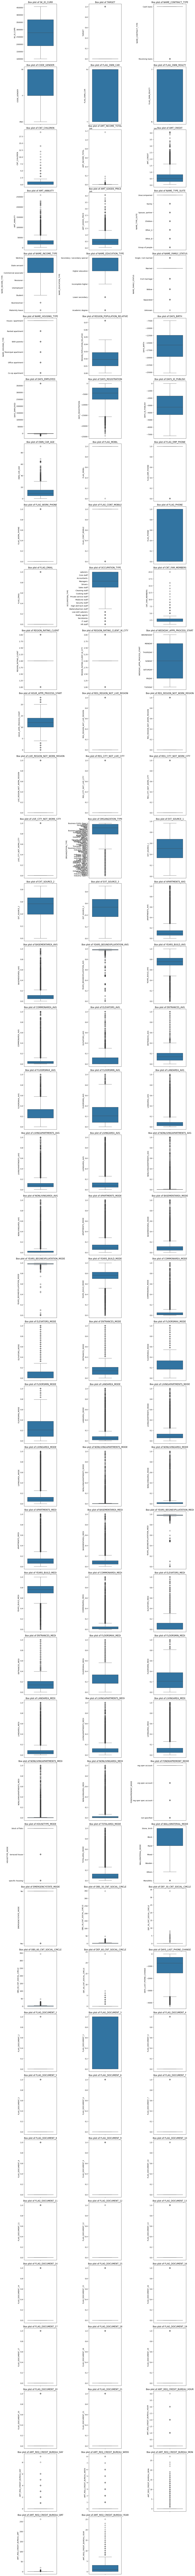

In [12]:
#Visualizing Data distribution through Box plot
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the plotting area
num_columns = len(df.columns)
num_rows = (num_columns // 3) + 1  # we want 3 plots per row

plt.figure(figsize=(15, num_rows * 5))

# Create a box plot for each variable, using a loop
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

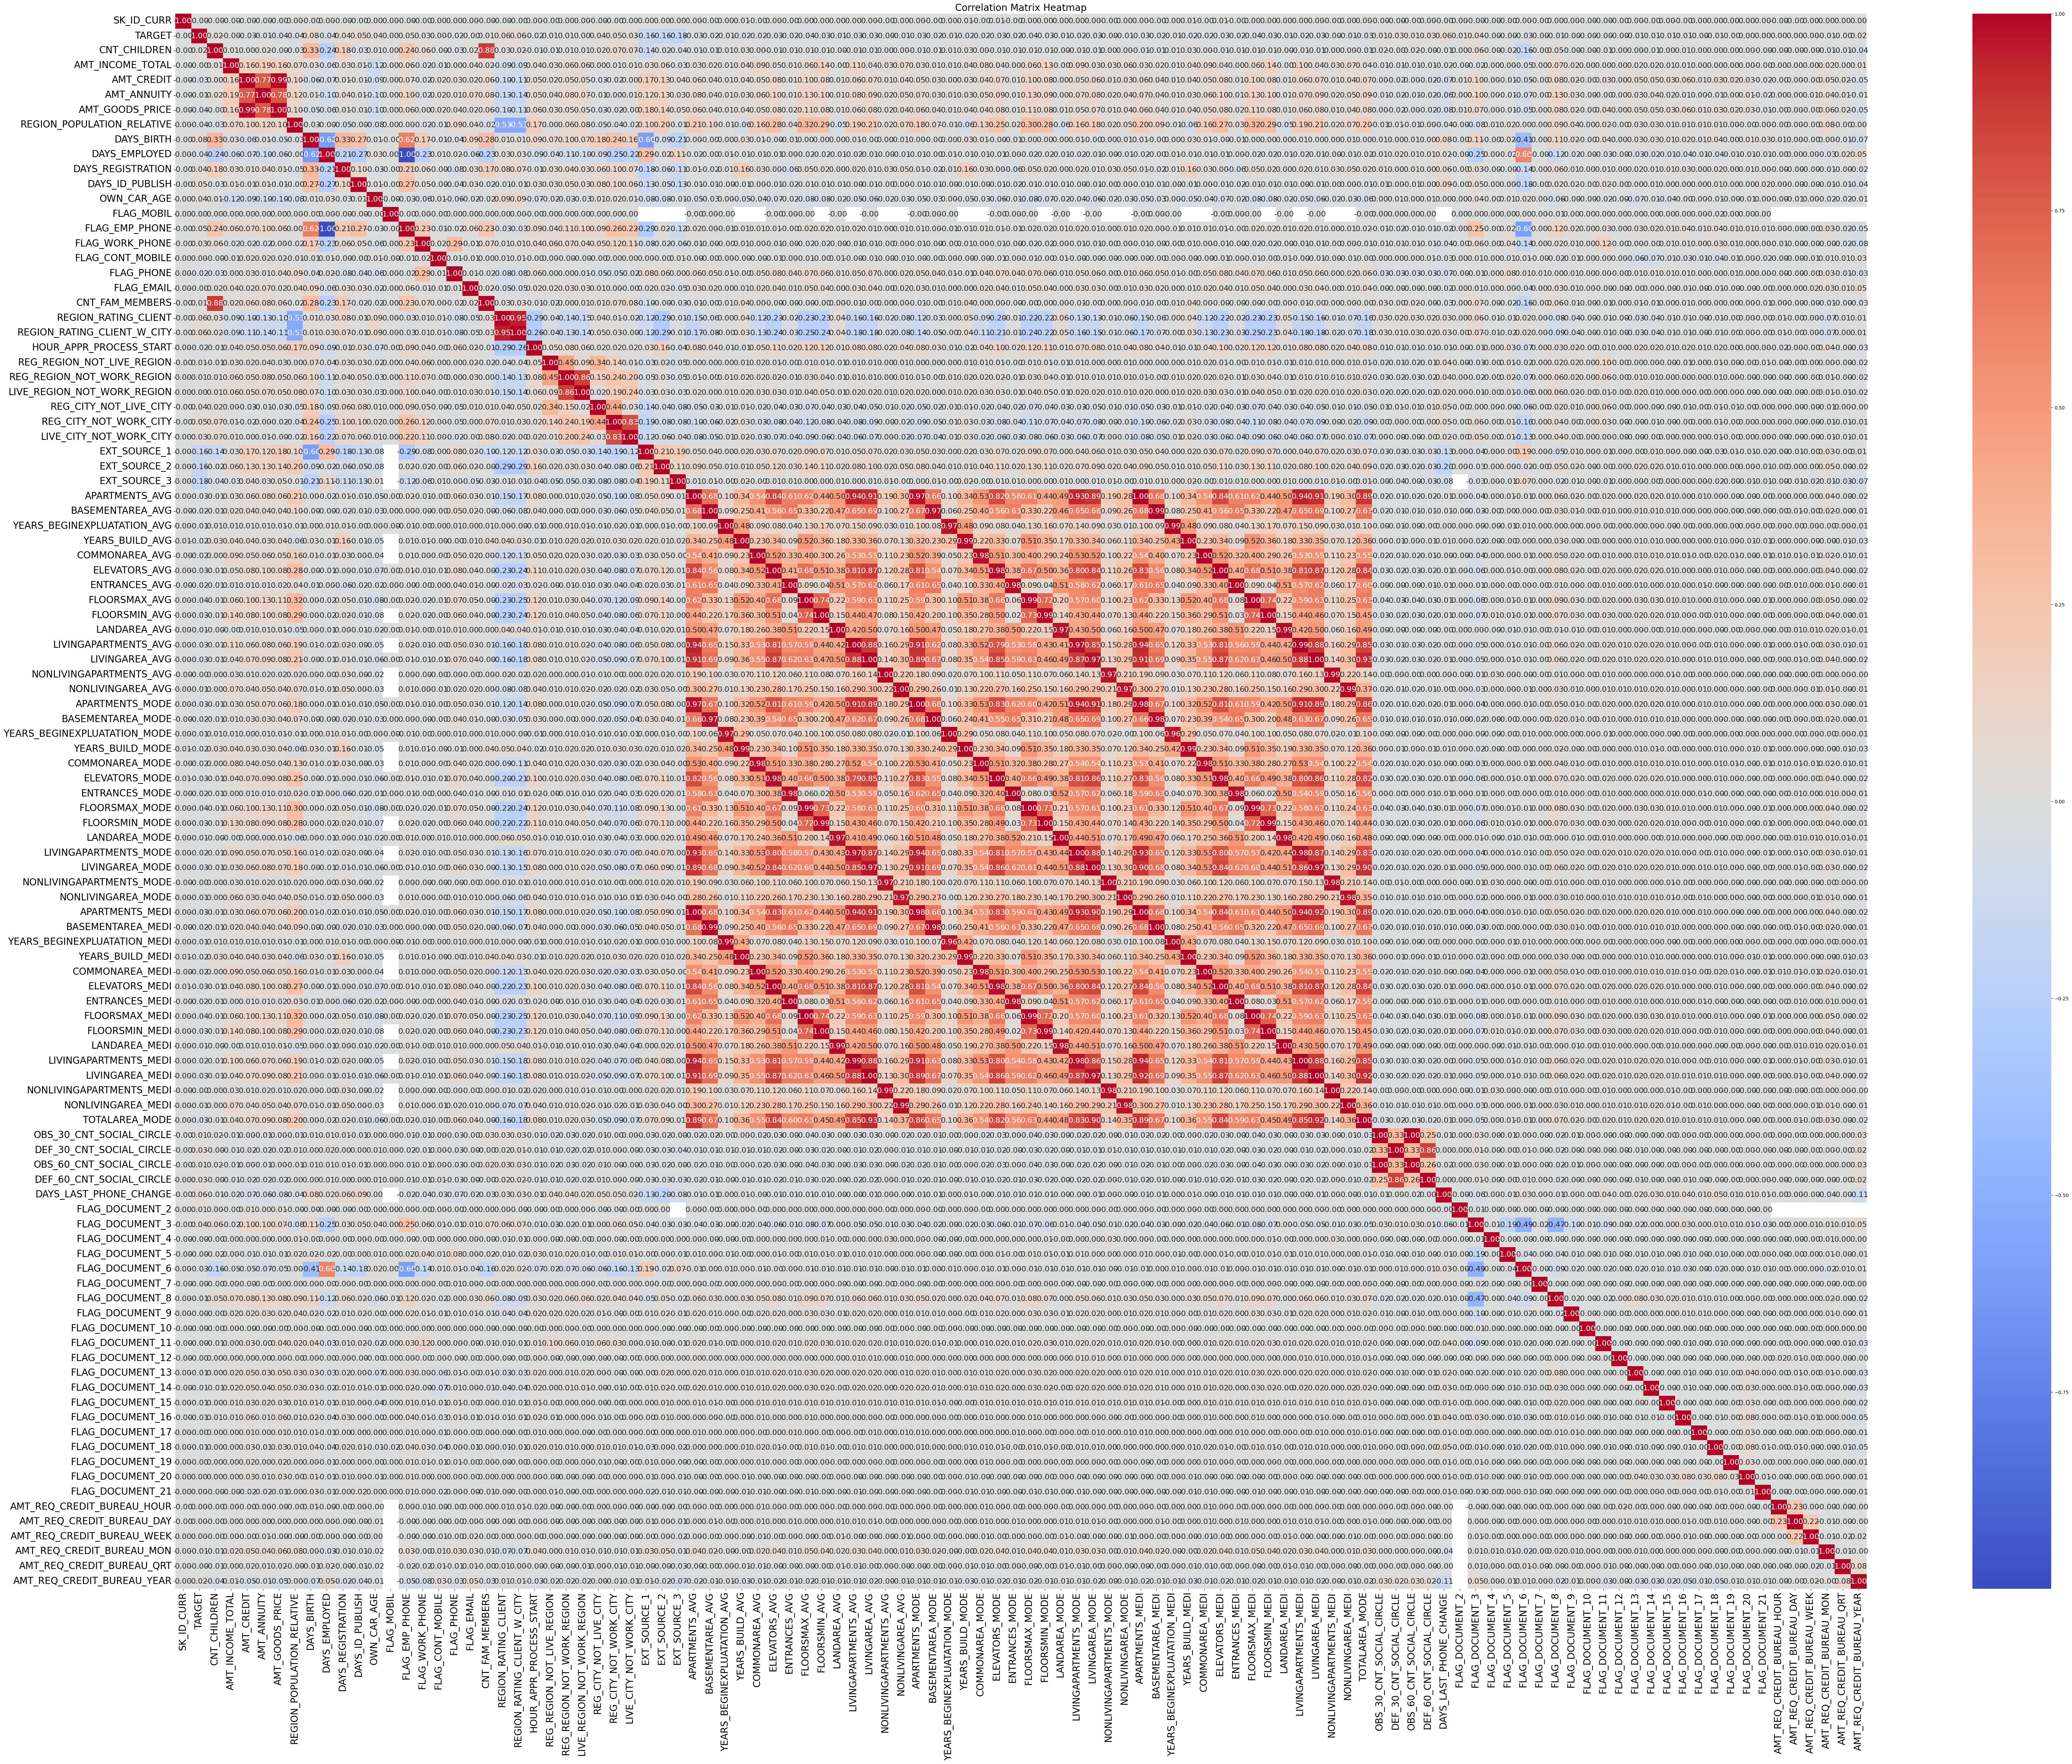

In [20]:
# Relationship between data, using correlation and heatmap
# Dataframe has string values, to measure the correlation those were not considered
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(80, 60))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})

# Customize font sizes for x and y labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Set title and adjust the title size
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Show the plot
plt.show()

**[Problem 3] Estimation on test data**

Perform the estimation on the test data (application_test.csv ) and submit it to Kaggle.

It does not matter if the accuracy is low, as long as the submission is done correctly

In [22]:
#Learning, in this step, linear regression will be trained on the preprocessed data.
#First we will standardization the numeric dataset
from sklearn.preprocessing import StandardScaler
#Define the objective variable and explanatory variables
X = numeric_df.drop(columns=['TARGET'])
y = numeric_df['TARGET']
#Standardization
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)
#Training the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# Predict on the testing set
y_pred = model.predict(X_test_scaled)

In [26]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.07


The Linear regresion model can 0.07 predict house prices.

**[Problem 4] Feature engineering**

To improve accuracy, perform Feature Engineering from the following perspectives.

Which feature to use?
How to preprocess?
Summarize what you did and how the evaluation metrics for the validation data turned out. Please conduct at least 5 patterns of training and validation.

If the accuracy is high, please make an estimate for the test data and submit it to Kaggle

In [27]:
from scipy.stats import kurtosis

# Assuming 'df' is your DataFrame and 'TARGET' is the column of interest
kurtosis_value = kurtosis(numeric_df['TARGET'])

print(f"Kurtosis of 'TARGET' variable: {kurtosis_value:.2f}")

Kurtosis of 'TARGET' variable: 7.47


The distribution has heavier tails and a higher peak compared to a normal distribution. This is leptokurtic.
The objective variable don not has a normal distributions, we will use Random Forest

In [28]:
from sklearn.preprocessing import StandardScaler
#Define the objective variable and explanatory variables
X = numeric_df.drop(columns=['TARGET'])
y = numeric_df['TARGET']
#Standardization
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [29]:
# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)
#Training the Random Forest model
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_scaled)


In [32]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf:.2f}')

rmse_rf = np.sqrt(mse_rf)
print(f'Root Mean Squared Error (Random Forest): {rmse_rf:.2f}')

from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r2_rf:.2f}')

Mean Squared Error (Random Forest): 0.07
Root Mean Squared Error (Random Forest): 0.27
R-squared (Random Forest): 0.03


Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): Lower values indicate better model performance in terms of prediction accuracy.

R-squared: Closer to 1 indicates a better fit of the model to the data.

Linear regression and Random Forest got 0.07 as a Mean Squared Error.

Linear regression with 75% training data

In [44]:
#Learning, in this step, linear regression will be trained on the preprocessed data.
#First we will standardization the numeric dataset
from sklearn.preprocessing import StandardScaler
#Define the objective variable and explanatory variables
X = numeric_df.drop(columns=['TARGET'])
y = numeric_df['TARGET']
#Standardization
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)
#Training the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
# Predict on the testing set
y_pred = model.predict(X_test_scaled)


In [47]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.07


There was not modifications changing the volume of training data set

Logistic Regression

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using accuracy score (for classification tasks)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Training the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using accuracy score (for classification tasks)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


Rnadom Forest

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Model will not accept missing values
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# Training the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using accuracy score (for classification tasks)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


Initially was applied Linear regression and Random Forest to make the predictions, both models had same performance.
After, was applied Logistic Regression, in this case the TARGET variable is analyzed as binary, getting 92% of accuracy, going for this way were applied Decision Tree and Randon Forest, however the accuracy did not improve.